# Linear Regression

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df.isnull().sum()
# to drop the null values
df.dropna(inplace=True)
df.isnull().sum()   

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(25324)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()   

np.int64(0)

In [8]:
# cat col --- num col
cat_col = df.select_dtypes(include="object")
cat_col.head()    

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [9]:
# Feature Selection
cat_col = cat_col.drop(["bike_name","city"],axis=1)
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [10]:
num_col = df.select_dtypes(exclude="object")
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [11]:
#cat ---> num
# label encoding
#one hot encoding

In [12]:
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [13]:
# one hot encoding
pd.get_dummies(cat_col).astype(int).head()    

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# label encoding --->  ordinal encoding
cat_col["owner"].value_counts() 

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [15]:
dt = {"First Owner":1,
      "Second Owner":2,
      "Third Owner":3,
      "Fourth Owner Or More":4}


In [16]:
cat_col["owner"] = cat_col["owner"].map(dt)
cat_col.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [17]:
cat_col["brand"].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [18]:
{i : key for key, i in enumerate(list(cat_col["brand"].unique()))}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [19]:
dt2 = {'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [20]:
cat_col["brand"] = cat_col["brand"].map(dt2)
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [21]:
final_dt = pd.concat([cat_col,num_col],axis=1)
final_dt.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [22]:
# Model training --- training(80) , testing(20)


In [23]:
matrix = final_dt.corr()
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

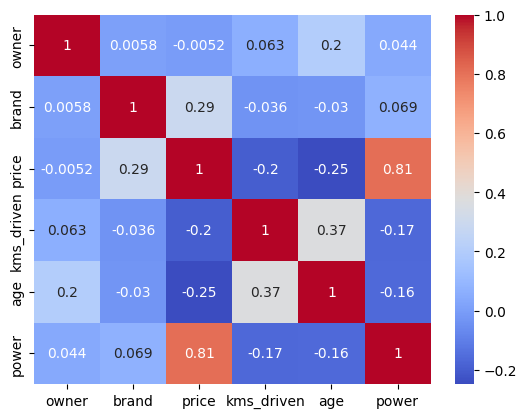

In [24]:
sns.heatmap(matrix, annot=True, cmap="coolwarm")

In [25]:
## divide the data into independent and dependent features
x = final_dt.drop("price",axis=1)
y = final_dt["price"]

In [26]:
#training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
model.score(x_train,y_train)

0.7053826605671762

In [29]:
model.score(x_test,y_test)

0.7586900869386048

In [30]:
y_pred = model.predict(x_test)
y_pred

array([125382.54523531, 216422.20333613,  96966.48595239, ...,
        72233.83615101, 208856.67620683,   9305.60087565], shape=(1465,))

In [31]:
d1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
d1

,Actual,Predicted
4909,88400.0,125382.545235
1942,102850.0,216422.203336
5763,67000.0,96966.485952
4800,30000.0,7571.713344
7614,20000.0,8532.577046
...,...,...
5653,395000.0,476134.279312
609,140000.0,175120.608085
4211,54500.0,72233.836151
6379,114000.0,208856.676207


In [32]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 34658.30986561101
Mean Squared Error: 4697994405.450356
Root Mean Squared Error: 68541.91714163206


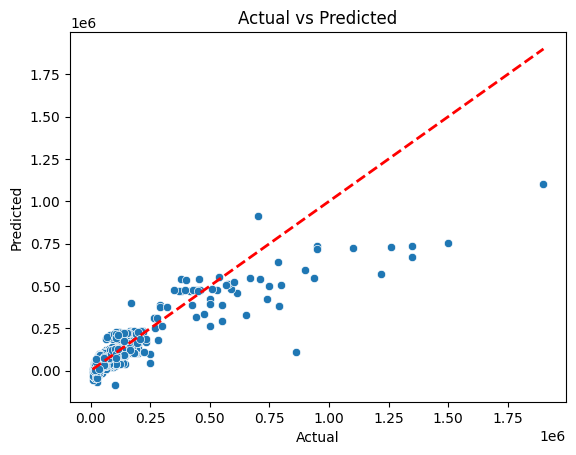

In [33]:
sns.scatterplot(x="Actual",y="Predicted",data=d1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="red",linewidth=2,linestyle="--")
plt.show()